In [1]:

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2025-07-21 08:55:18.161656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753088118.514329      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753088118.608574      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50

In [3]:
## 定義圖片路徑

trainPath = '/kaggle/input/all-data457-split/all_data457_split/train'
validationPath = '/kaggle/input/all-data457-split/all_data457_split/val'
testPath = '/kaggle/input/all-data457-split/all_data457_split/test'

## 定義基本參數
imageSize = (300, 300)
imageShape = (300, 300, 3)
numofClass = 50
batchSize = 8
epoch = 15


## 定義 ImageDataGenerator (train)

trainDataGenerator = ImageDataGenerator(rescale = 1 / 255,
                      rotation_range=40,
                      width_shift_range = 0.3,
                      height_shift_range = 0.3,
                      shear_range = 0.3,
                      zoom_range = 0.2,
                      horizontal_flip = True,
                      fill_mode = 'nearest')


trainBatches = trainDataGenerator.flow_from_directory(directory = trainPath,
                            target_size = imageSize,
                            interpolation = 'bicubic',
                            class_mode = 'categorical',#生成one-hot 標籤
                            shuffle = True,
                            batch_size = batchSize)


## 定義 ImageDataGenerator (validation)
validateDataGenerator = ImageDataGenerator(rescale=1 / 255)
validateBatches = validateDataGenerator.flow_from_directory(directory = validationPath,
                            target_size = imageSize,
                            interpolation = 'bicubic',
                            class_mode = 'categorical',
                            shuffle = False,
                            batch_size = batchSize)

testDataGenerator = ImageDataGenerator(rescale=1/255)
testBatches = testDataGenerator.flow_from_directory(
    directory=testPath,
    target_size=imageSize,
    interpolation='bicubic',
    class_mode='categorical',
    shuffle=False,
    batch_size=batchSize
)

Found 18246 images belonging to 50 classes.
Found 2248 images belonging to 50 classes.
Found 2350 images belonging to 50 classes.


I0000 00:00:1753088162.636495      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753088162.637253      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training ResNet50...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1753088216.764579      83 service.cc:148] XLA service 0x7b1f78003940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753088216.766784      83 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753088216.766807      83 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753088221.465728      83 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1753088241.783270      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 1.75603, saving model to /kaggle/working/model2_resnet.keras
2281/2281 - 1080s - 473ms/step - accuracy: 0.4336 - loss: 2.2714 - val_accuracy: 0.5556 - val_loss: 1.7560
Epoch 2/15

Epoch 2: val_loss improved from 1.75603 to 1.21000, saving model to /kaggle/working/model2_resnet.keras
2281/2281 - 798s - 350ms/step - accuracy: 0.5845 - loss: 1.3772 - val_accuracy: 0.6757 - val_loss: 1.2100
Epoch 3/15

Epoch 3: val_loss did not improve from 1.21000
2281/2281 - 789s - 346ms/step - accuracy: 0.6238 - loss: 1.2200 - val_accuracy: 0.6615 - val_loss: 1.3243
Epoch 4/15

Epoch 4: val_loss improved from 1.21000 to 1.01242, saving model to /kaggle/working/model2_resnet.keras
2281/2281 - 797s - 350ms/step - accuracy: 0.6505 - loss: 1.1538 - val_accuracy: 0.7082 - val_loss: 1.0124
Epoch 5/15

Epoch 5: val_loss did not improve from 1.01242
2281/2281 - 832s - 365ms/step - accuracy: 0.6783 - loss: 1.0283 - val_accuracy: 0.6477 - val_loss: 1.4280
Epoch 6/15

Epoch 

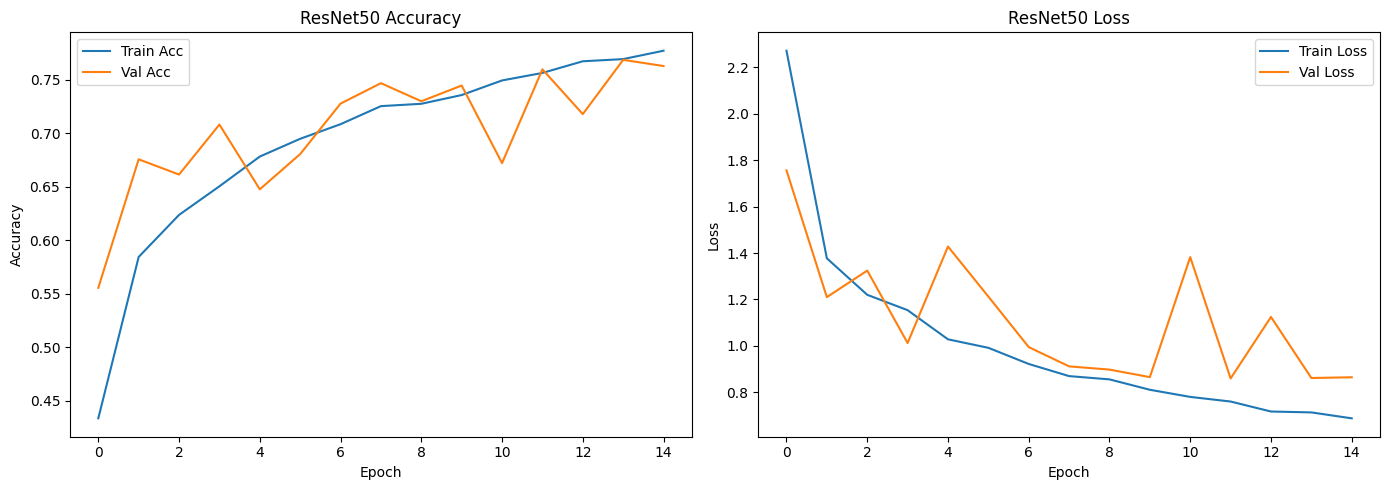

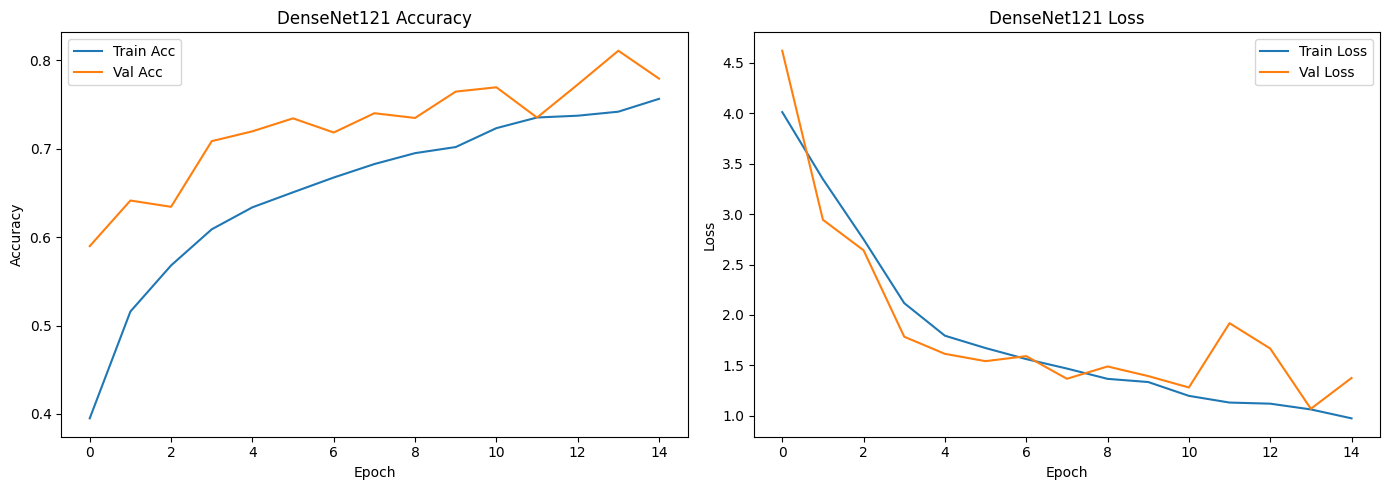

Generating predictions from ResNet50 and DenseNet121...
✅ Top-1 Accuracy (Soft Voting): 0.7911
✅ Top-5 Accuracy: 0.9715


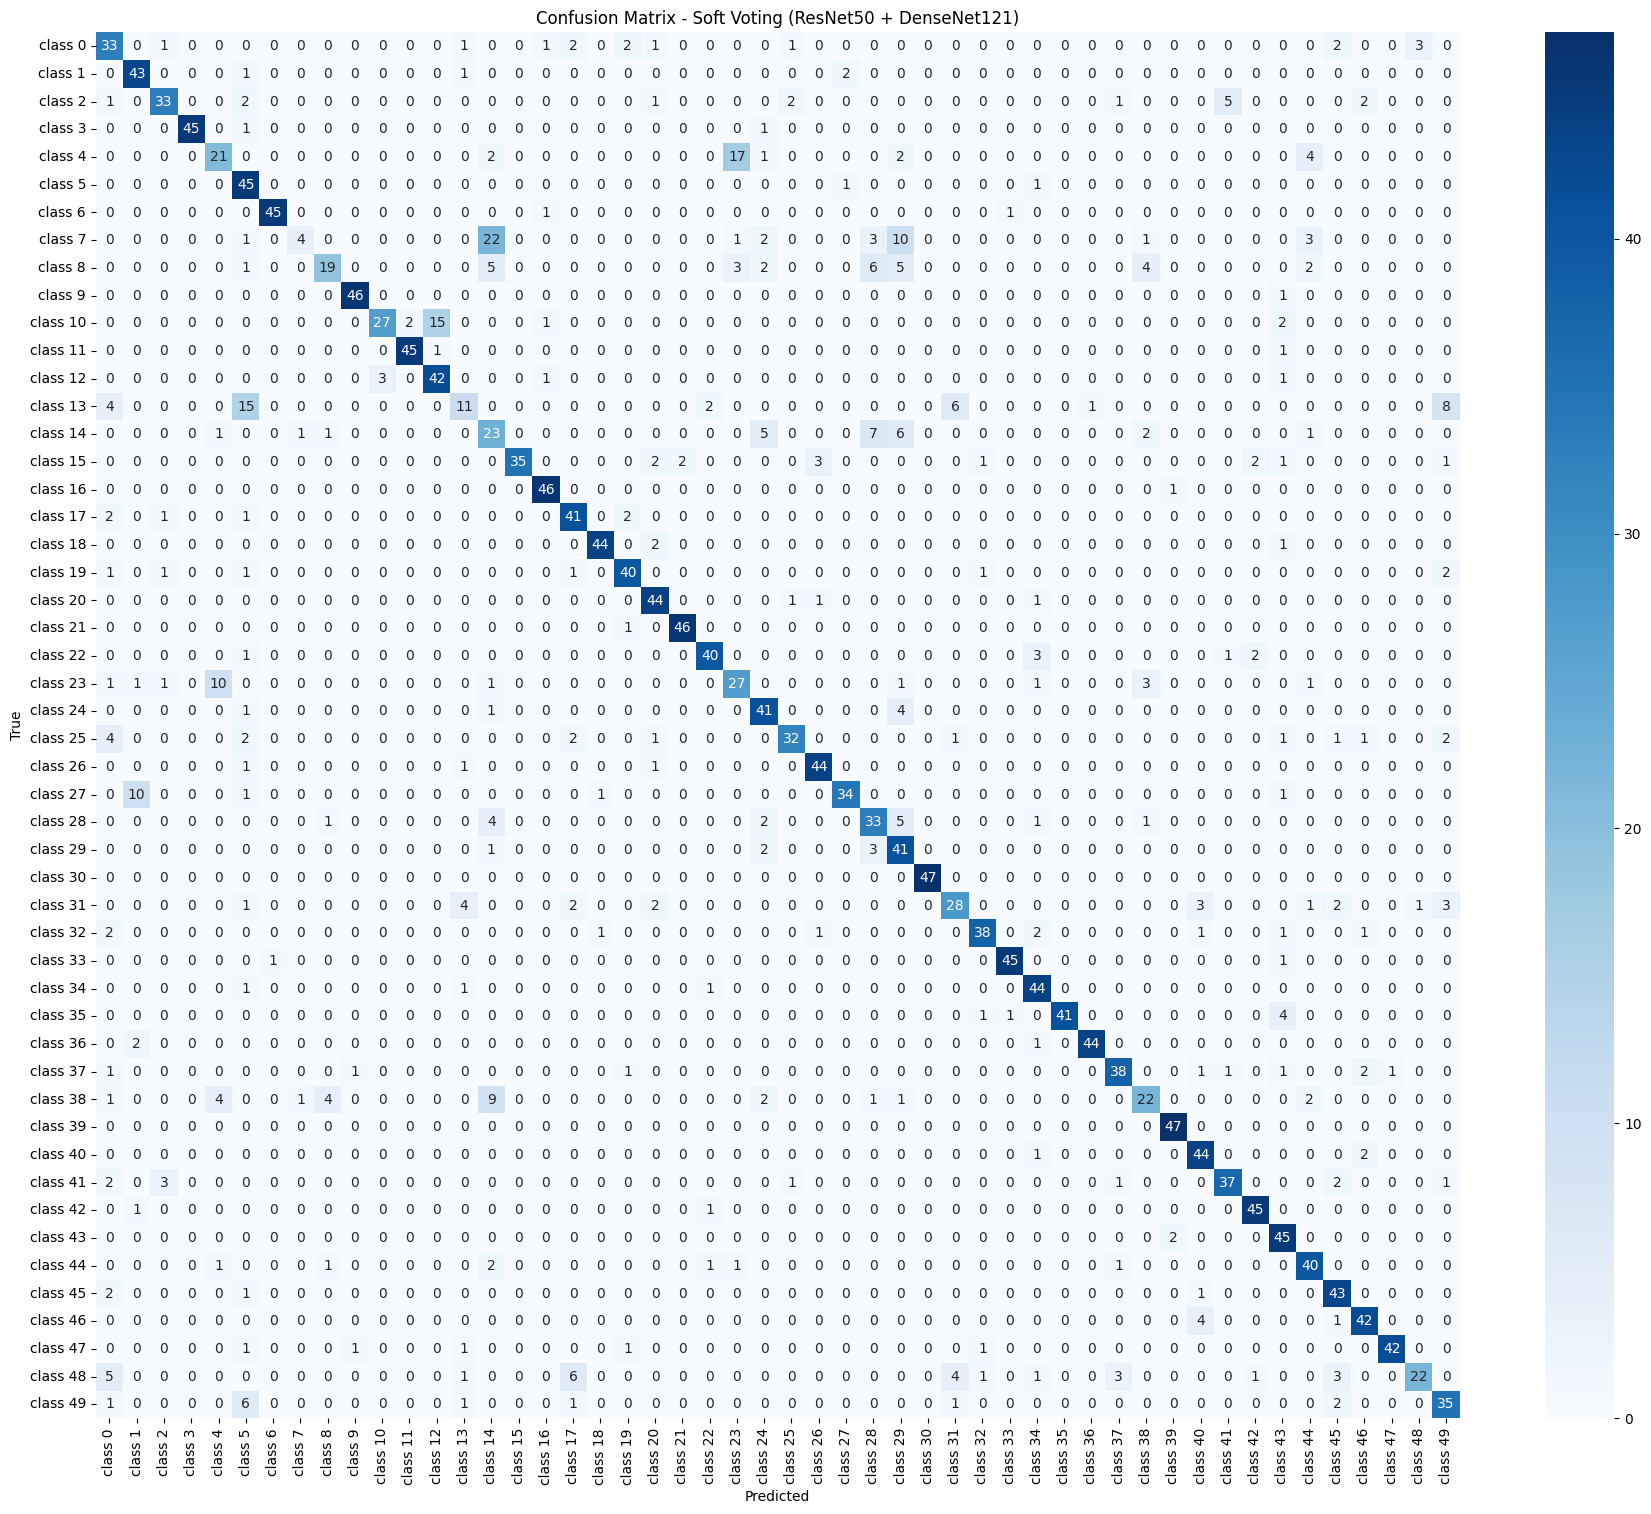

In [4]:
# --- 匯入套件 ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, top_k_accuracy_score

from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


# ResNet50
input_layer = Input(shape=imageShape)
base2 = ResNet50(include_top=False, weights='imagenet', input_shape=imageShape)
x2 = Flatten()(base2(input_layer))
output2 = Dense(numofClass, activation='softmax')(x2)
model2 = Model(inputs=input_layer, outputs=output2)
model2.trainable = True
model2.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# DenseNet121
base3 = DenseNet121(include_top=False, weights='imagenet', input_shape=imageShape)
x3 = Flatten()(base3(input_layer))
output3 = Dense(numofClass, activation='softmax')(x3)
model3 = Model(inputs=input_layer, outputs=output3)
model3.trainable = True
model3.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoints
checkpointer2 = ModelCheckpoint('/kaggle/working/model2_resnet.keras', save_best_only=True, verbose=1)
checkpointer3 = ModelCheckpoint('/kaggle/working/model3_densenet.keras', save_best_only=True, verbose=1)

# 訓練模型
print("Training ResNet50...")
history2 = model2.fit(trainBatches, validation_data=validateBatches, epochs=epoch, callbacks=[checkpointer2], verbose=2)

print("Training DenseNet121...")
history3 = model3.fit(trainBatches, validation_data=validateBatches, epochs=epoch, callbacks=[checkpointer3], verbose=2)

# --- 繪製訓練曲線 ---
def plot_history(history, title):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history2, 'ResNet50')
plot_history(history3, 'DenseNet121')

# --- 測試階段：Soft Voting 預測 ---
def get_predictions(model, generator):
    preds, labels = [], []
    steps = len(generator)
    for _ in range(steps):
        x, y = next(generator)
        preds.extend(model.predict(x, verbose=0))
        labels.extend(y)
    return np.array(preds), np.array(labels)

print("Generating predictions from ResNet50 and DenseNet121...")
preds2, labels = get_predictions(model2, testBatches)
preds3, _ = get_predictions(model3, testBatches)

# 機率平均（Soft Voting）
avg_probs = (preds2 + preds3) / 2.0
final_preds = np.argmax(avg_probs, axis=1)
true_labels = np.argmax(labels, axis=1)

# 準確率評估
top1_acc = accuracy_score(true_labels, final_preds)
top5_acc = top_k_accuracy_score(true_labels, avg_probs, k=5)

print(f"✅ Top-1 Accuracy (Soft Voting): {top1_acc:.4f}")
print(f"✅ Top-5 Accuracy: {top5_acc:.4f}")

# 混淆矩陣
conf_matrix = confusion_matrix(true_labels, final_preds)
class_names = [f'class {i}' for i in range(numofClass)]

plt.figure(figsize=(22, 18))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Soft Voting (ResNet50 + DenseNet121)')
plt.show()
